Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
Limpeza e tratamento de Dados

In [1]:
import pandas as pd
import seaborn as srn
import statistics  as sts

In [2]:
#Importar os dados
dataset = pd.read_csv("Churn.csv", sep=";")
#Visualizar
dataset.head()

X0   X1  X2        X3  X4  X4.1        X6  X7  X8  X9         X10  X11
0   1  619  RS  Feminino  42     2         0   1   1   1  10134888.0    1
1   2  608  SC  Feminino  41     1   8380786   1   0   1  11254258.0    0
2   3  502  RS  Feminino  42     8   1596608   3   1   0  11393157.0    1
3   4  699  RS  Feminino  39     1         0   2   0   0   9382663.0    0
4   5  850  SC  Feminino  43     2  12551082   1   1   1    790841.0    0

In [3]:
#Alterar o nome das colunas
dataset.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito",
                    "Ativo","Salario","Saiu"]

In [4]:
#Visulizar
dataset.head()

Id  Score Estado    Genero  Idade  Patrimonio     Saldo  Produtos  \
0   1    619     RS  Feminino     42           2         0         1   
1   2    608     SC  Feminino     41           1   8380786         1   
2   3    502     RS  Feminino     42           8   1596608         3   
3   4    699     RS  Feminino     39           1         0         2   
4   5    850     SC  Feminino     43           2  12551082         1   

   TemCartCredito  Ativo     Salario  Saiu  
0               1      1  10134888.0     1  
1               0      1  11254258.0     0  
2               1      0  11393157.0     1  
3               0      0   9382663.0     0  
4               1      1    790841.0     0

In [5]:
#Explorar dados categoricos
#(estado)
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

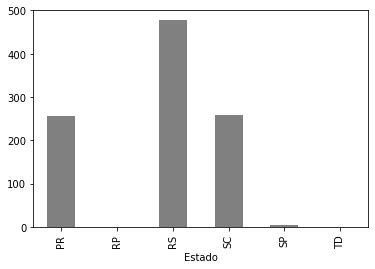

In [6]:
agrupado.plot.bar(color = 'gray')

In [7]:
#genero
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [8]:
#Explorar colunas numéricas
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

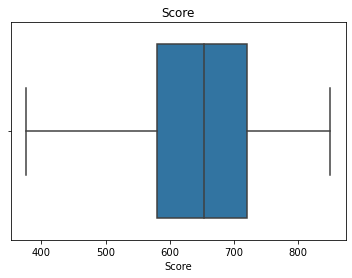

In [9]:
srn.boxplot(dataset['Score']).set_title('Score')

Text(0.5, 1.0, 'Score')

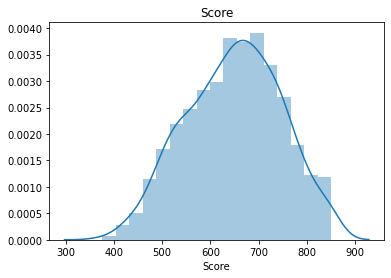

In [10]:
srn.distplot(dataset['Score']).set_title('Score')

In [11]:
#Idade
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

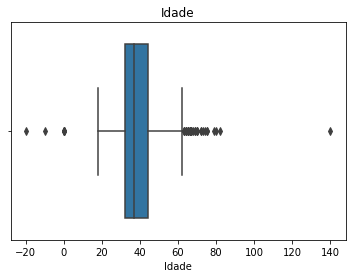

In [12]:
srn.boxplot(dataset['Idade']).set_title('Idade')

Text(0.5, 1.0, 'Idade')

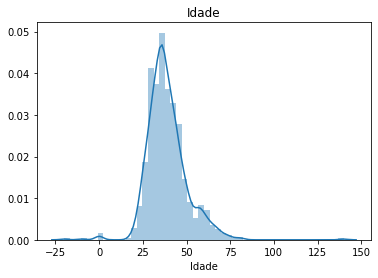

In [13]:
srn.distplot(dataset['Idade']).set_title('Idade')

In [14]:
#Saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

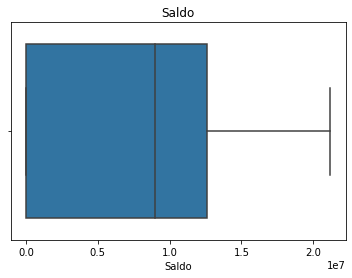

In [15]:
srn.boxplot(dataset['Saldo']).set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

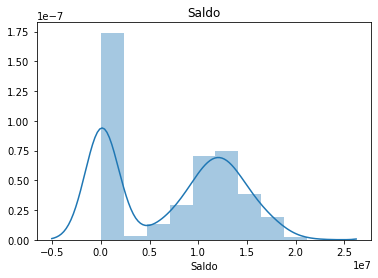

In [16]:
srn.distplot(dataset['Saldo']).set_title('Saldo')

In [17]:
#Salário
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [18]:
#Consultar valores NAN,faltantes
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [19]:
#Alterar valores faltes pela mediana

In [20]:
#Salarios
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [21]:
mediana = sts.median(dataset['Salario'])
mediana

70518.0

In [22]:
#Substituir NAN por mediana
dataset['Salario'].fillna(mediana, inplace=True)

In [23]:
#Verificar se ainda existe valores NAN
dataset['Salario'].isnull().sum()

0

In [24]:
#Genêros

In [25]:
#Genero, falta de padronização e NAS
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [26]:
#Total de NAS
dataset['Genero'].isnull().sum()

8

In [27]:
#Preencher NAs com Masculino (moda)
dataset['Genero'].fillna('Masculino', inplace=True)

In [28]:
#Verificamos novamente NANs
dataset['Genero'].isnull().sum()

0

In [29]:
#Padronização de acordo com o dominio
dataset.loc[dataset['Genero'] ==  'M', 'Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin( ['Fem','F']), 'Genero'] = "Feminino"

In [30]:
#Visualizar o resultado
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [31]:
#Idades fora do dominio
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [32]:
#Visualizar 
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

Id  Score Estado     Genero  Idade  Patrimonio     Saldo  Produtos  \
867  869    636     RS   Feminino    -10           1  17083346         1   
984  986    773     RS  Masculino    -20           1  12453278         2   
990  992    655     RS  Masculino    140           5     93147         2   

     TemCartCredito  Ativo     Salario  Saiu  
867               1      0  11051028.0     1  
984               0      1   1172357.0     0  
990               1      0   6621413.0     0

In [33]:
#Calular a mediana
mediana = sts.median(dataset['Idade'])
mediana

37

In [34]:
#Substituir
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120), 'Idade'] = mediana

In [35]:
#Verificar se ainda existem idades fora do domínio
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

Empty DataFrame
Columns: [Id, Score, Estado, Genero, Idade, Patrimonio, Saldo, Produtos, TemCartCredito, Ativo, Salario, Saiu]
Index: []

In [36]:
#Verificar se existe dados duplicados, buscamos pelo ID
dataset[dataset.duplicated(['Id'],keep=False)]

Id  Score Estado    Genero  Idade  Patrimonio    Saldo  Produtos  \
80  81    665     RS  Feminino     34           1  9664554         2   
81  81    665     RS  Feminino     34           1  9664554         2   

    TemCartCredito  Ativo     Salario  Saiu  
80               0      0  17141366.0     0  
81               0      0  17141366.0     0

In [37]:
#Excluir pelo ID
dataset.drop_duplicates(subset="Id", keep='first',inplace=True)

In [38]:
#Verificar se ainda existe
dataset[dataset.duplicated(['Id'],keep=False)]

Empty DataFrame
Columns: [Id, Score, Estado, Genero, Idade, Patrimonio, Saldo, Produtos, TemCartCredito, Ativo, Salario, Saiu]
Index: []

In [39]:
#Estados foras do domínio
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [40]:
#Atribuir RS (moda)
dataset.loc[dataset['Estado'].isin( ['RP','SP','TD']), 'Estado'] = "RS"
agrupado = dataset.groupby(['Estado']).size()

In [41]:
#Verificar o resultado
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [42]:
#Outliers em salários (considerar 2 desvios padrão)
desv = sts.stdev(dataset['Salario'])
desv

528988918.4679201

In [43]:
#Definir o padrão como maior que 2 desvios padrão
dataset.loc[dataset['Salario'] >=  2 * desv ] 

Id  Score Estado     Genero  Idade  Patrimonio     Saldo  Produtos  \
7      8    376     PR   Feminino     29           4  11504674         4   
116  118    668     PR   Feminino     37           6   1678644         1   
170  172    484     RS   Feminino     29           4  13011439         1   
230  232    673     RS  Masculino     72           1         0         2   

     TemCartCredito  Ativo       Salario  Saiu  
7                 1      0  1.193469e+10     1  
116               1      0  1.156383e+10     0  
170               1      0  1.640179e+09     0  
230               0      1  1.119812e+09     0

In [44]:
#Atualizar salarios para mediana
mediana = sts.median(dataset['Salario'])
mediana

8637195.5

In [45]:
#atribuir
dataset.loc[dataset['Salario'] >=  2 * desv, 'Salario'] = mediana

In [46]:
#Checar se ainda existe
dataset.loc[dataset['Salario'] >=  2 * desv ] 

Empty DataFrame
Columns: [Id, Score, Estado, Genero, Idade, Patrimonio, Saldo, Produtos, TemCartCredito, Ativo, Salario, Saiu]
Index: []

In [47]:
dataset.head()

Id  Score Estado    Genero  Idade  Patrimonio     Saldo  Produtos  \
0   1    619     RS  Feminino     42           2         0         1   
1   2    608     SC  Feminino     41           1   8380786         1   
2   3    502     RS  Feminino     42           8   1596608         3   
3   4    699     RS  Feminino     39           1         0         2   
4   5    850     SC  Feminino     43           2  12551082         1   

   TemCartCredito  Ativo     Salario  Saiu  
0               1      1  10134888.0     1  
1               0      1  11254258.0     0  
2               1      0  11393157.0     1  
3               0      0   9382663.0     0  
4               1      1    790841.0     0